In [1]:
import torch
import torch.nn.functional as F
from torch import nn, optim
from torch.utils.data import DataLoader

from CoordConvModule import *
import matplotlib.pyplot as plt
import numpy as np
from random import randrange
# from torchsummary import summary

In [2]:
testset = torch.load('../data/testset_10steps.pt')

FileNotFoundError: [Errno 2] No such file or directory: '../data/testset_10steps.pt'

In [ ]:
testloader = DataLoader(testset, batch_size=1, shuffle=True)

NameError: name 'testset' is not defined

In [3]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Input size: [batch, 3, 100, 100]
        # Output size: [batch, 3, 100, 100]
        self.encoder = nn.Sequential(
            CoordConv(3, 64, kernel_size = 1, stride=1),
            nn.LeakyReLU(),
            nn.Conv2d(64, 64, kernel_size = 5, stride=1, padding=1),
            # nn.BatchNorm2d(64),
            nn.LeakyReLU(),
            nn.Conv2d(64, 64, 7, stride=1, padding=1),
            # nn.BatchNorm2d(6
            nn.LeakyReLU(),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 64, 7, stride=1, padding=1),
            nn.LeakyReLU(),
            nn.ConvTranspose2d(64, 64, 5, stride=1, padding=1),
            nn.LeakyReLU(),
            nn.Conv2d(64, 3, 1, stride=1)
        )

    def forward(self, x):
        # print(x.size())
        # wall = x[:, -1]
        # print(wall.size())
        x = self.encoder(x)
        x = self.decoder(x)
        # print(x.size())
        # x = torch.cat((x, wall.reshape(len(x), 1, width_fig, width_fig)), 1)
        # print(x.size())
        return x

In [4]:
class StepAE(nn.Module):
    def __init__(self):
        """Variational Auto-Encoder Class"""
        super(StepAE, self).__init__()
        
        self.enc = Autoencoder()

    def step(self, x): # For actual run after training
        x = self.enc(x)
        return x

    def forward(self, x): # For training
        # Encode x to z
        recon1 = self.enc(x)
        recon2 = self.enc(recon1)
        recon3 = self.enc(recon2)
        recon4 = self.enc(recon3)
        # recon5 = self.enc(recon4)
        
        return recon1, recon2, recon3, recon4

# Figure

In [6]:
def figplot():
    model_origin.eval()
    dataiter = iter(testloader)
    images, _, _, _, _, _, _, _, _, _ = dataiter.next()
    del _

    recon = model_origin.step(images.permute(0, 3, 1, 2).cuda())

    # del _
    torch.cuda.empty_cache()
    # get sample outputs

    steps = 300
    skip = int(steps/10)
    
    plt.figure(figsize=(6, 24))
    ax=plt.subplot(12,1,1)
    plt.imshow(images.permute(0,3,1,2).view(1,3,100,100).cpu()[0].permute(1,2,0))
    ax=plt.subplot(12,1,2)
    output = recon.detach().view(1, 3, 100, 100).cpu()[0].permute(1,2,0)
    plt.imshow(output)
    ii = 0
    for i in range(steps):
        recon = model_origin.step(recon)
        # del _
        
        if i%skip == 0:
            ii+=1
            ax = plt.subplot(12, 1, ii + 2)
            # print(i)
            # output is resized into a batch of iages
            # use detach when it's an output that requires_grad
            output = recon.detach().view(1, 3, 100, 100).cpu()[0].permute(1, 2, 0)
            # print(output.min(), output.max())
            plt.imshow(output)
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            del output
            torch.cuda.empty_cache()
    # plt.savefig("../data/model/"+timestampStr+"/fig_{}_{}.png".format(epochnow, step))
    # torch.save(images, "../data/model/"+timestampStr+"/input_{}_{}.pt".format(epochnow,step))
    del images
    del recon
    del dataiter

In [21]:
width_fig = 100

In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_origin = StepAE().to(device)
model_origin.load_state_dict(torch.load("latest_net_wdisc.pt"))

<All keys matched successfully>

In [23]:
model_origin.eval()

StepAE(
  (enc): Autoencoder(
    (encoder): Sequential(
      (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
      (3): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): LeakyReLU(negative_slope=0.01)
    )
    (decoder): Sequential(
      (0): ConvTranspose2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
      (1): LeakyReLU(negative_slope=0.01)
      (2): ConvTranspose2d(32, 3, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    )
  )
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

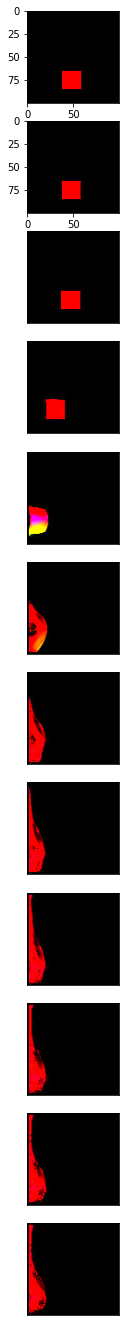

In [10]:
figplot()

# Animation

In [11]:
from matplotlib import pyplot as plt
from celluloid import Camera


In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_origin = StepAE().to(device)
model_origin.load_state_dict(torch.load("latest_deeper_net.pt"))
model_origin.eval()

StepAE(
  (enc): Autoencoder(
    (encoder): Sequential(
      (0): CoordConv(
        (addcoords): AddCoords()
        (conv): Conv2d(5, 64, kernel_size=(1, 1), stride=(1, 1))
      )
      (1): LeakyReLU(negative_slope=0.01)
      (2): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
      (3): LeakyReLU(negative_slope=0.01)
      (4): Conv2d(64, 64, kernel_size=(7, 7), stride=(1, 1), padding=(1, 1))
      (5): LeakyReLU(negative_slope=0.01)
    )
    (decoder): Sequential(
      (0): ConvTranspose2d(64, 64, kernel_size=(7, 7), stride=(1, 1), padding=(1, 1))
      (1): LeakyReLU(negative_slope=0.01)
      (2): ConvTranspose2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
      (3): LeakyReLU(negative_slope=0.01)
      (4): Conv2d(64, 3, kernel_size=(1, 1), stride=(1, 1))
    )
  )
)

In [8]:
def animation(figname):
    model_origin.eval()
    dataiter = iter(testloader)
    images, *_ = dataiter.next()
    del _
    
    tmpmtx_cplot = [[[0, 0.5, 0.5] for i in range(width_fig)] for i in range(width_fig)]
    tmpmtx_cplot_mul = [[[2, 10, 10] for i in range(width_fig)] for i in range(width_fig)]
    recon = model_origin.step(images.permute(0, 3, 1, 2).cuda())

    # del _
    torch.cuda.empty_cache()
    # get sample outputs

    steps = 200
    skip = 2
    
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111)
    camera1 = Camera(fig1)
    camera2 = Camera(fig2)

    output = recon.detach().view(1, 3, 100, 100).cpu()[0].permute(1,2,0)
    ax1.imshow(np.multiply(output.numpy(), tmpmtx_cplot_mul) + tmpmtx_cplot, vmax=20, vmin=-20)
    camera1.snap()
    mass = recon.detach().view(1, 3, 100, 100).cpu()[0][0].view(1, 100, 100).permute(1,2,0)
    ax2.imshow(mass, vmax=5, vmin=0, cmap='gray_r')
    camera2.snap()
    
    ii = 0
    for i in range(steps):
        recon = model_origin.step(recon)
        # del _
        
        if i%skip == 0:
            ii+=1
            # ax = plt.subplot(12, 1, ii + 2)
            # print(i)
            # output is resized into a batch of iages
            # use detach when it's an output that requires_grad
            output = recon.detach().view(1, 3, 100, 100).cpu()[0].permute(1, 2, 0)
            mass = recon.detach().view(1, 3, 100, 100).cpu()[0][0].view(1, 100, 100).permute(1,2,0)
            # print(output.min(), output.max())
            # plt.imshow(output)
            ax1.imshow(np.multiply(output.numpy(), tmpmtx_cplot_mul) + tmpmtx_cplot, vmax=20, vmin=-20)
            ax1.get_xaxis().set_visible(False)
            ax1.get_yaxis().set_visible(False)
            camera1.snap()

            ax2.imshow(mass, vmax=5, vmin=0, cmap='gray_r')
            ax2.get_xaxis().set_visible(False)
            ax2.get_yaxis().set_visible(False)
            camera2.snap()
            del output
            torch.cuda.empty_cache()
    # plt.savefig("../data/model/"+timestampStr+"/fig_{}_{}.png".format(epochnow, step))
    # torch.save(images, "../data/model/"+timestampStr+"/input_{}_{}.pt".format(epochnow,step))
    animation = camera1.animate()
    animation.save("../gif3/"+figname + '.gif', writer = 'imagemagick', fps=100)
    animation2 = camera2.animate()
    animation2.save("../gif3/"+figname + '_mass.gif', writer = 'imagemagick', fps=100)
    del images
    del recon
    del dataiter

In [9]:
for i in range(1, 1001):
    animation(figname="gif_{}".format(int(i)))

NameError: name 'testloader' is not defined

# GT comparision

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from celluloid import Camera
# code/taichi/sand_collapse/solvers/data/model/Deeper_08_Jun_2022_09_13/input_17_100.pt

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_origin = StepAE().to(device)
model_origin.load_state_dict(torch.load("../data/model/Deeper_08_Jun_2022_09_13/input_17_100.pt"))
model_origin.eval()

In [7]:
start_frame = 10
frame_make = 80
width_fig = 100

In [8]:
def wholegif(index): 
    gt = np.load('../data/npy/sequence_{}.npy'.format(index))
    print(gt.shape)

    fig = plt.figure()
    camera = Camera(fig)
    for i in range(start_frame, frame_make + start_frame+1):
        plt.imshow(gt[i*4,:,:,0], cmap = 'gray_r', vmax=5, vmin=0)
        camera.snap()
    animation = camera.animate()
    animation.save('../data/deeper_comp_gif/gt_{}.gif'.format(index), writer = 'imagemagick',fps=100)

    model_origin.eval()
    images = torch.Tensor([gt[start_frame*4,:,:,:]])
    print(images.size())
    # del _

    tmpmtx_cplot = [[[0, 0.5, 0.5] for i in range(width_fig)] for i in range(width_fig)]
    tmpmtx_cplot_mul = [[[2, 10, 10] for i in range(width_fig)] for i in range(width_fig)]
    recon = model_origin.step(images.permute(0, 3, 1, 2).cuda())

    # del _
    torch.cuda.empty_cache()
    # get sample outputs

    steps = frame_make*2
    skip = 2

    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111)
    camera1 = Camera(fig1)
    camera2 = Camera(fig2)

    output = recon.detach().view(1, 3, 100, 100).cpu()[0].permute(1,2,0)
    ax1.imshow(np.multiply(output.numpy(), tmpmtx_cplot_mul) + tmpmtx_cplot, vmax=20, vmin=-20)
    camera1.snap()
    mass = recon.detach().view(1, 3, 100, 100).cpu()[0][0].view(1, 100, 100).permute(1,2,0)
    ax2.imshow(mass, vmax=5, vmin=0, cmap='gray_r')
    camera2.snap()

    ii = 0
    for i in range(steps):
        recon = model_origin.step(recon)
        # del _
        
        if i%skip == 0:
            ii+=1
            # ax = plt.subplot(12, 1, ii + 2)
            # print(i)
            # output is resized into a batch of iages
            # use detach when it's an output that requires_grad
            output = recon.detach().view(1, 3, 100, 100).cpu()[0].permute(1, 2, 0)
            mass = recon.detach().view(1, 3, 100, 100).cpu()[0][0].view(1, 100, 100).permute(1,2,0)
            # print(output.min(), output.max())
            # plt.imshow(output)
            ax1.imshow(np.multiply(output.numpy(), tmpmtx_cplot_mul) + tmpmtx_cplot, vmax=20, vmin=-20)
            ax1.get_xaxis().set_visible(False)
            ax1.get_yaxis().set_visible(False)
            camera1.snap()

            ax2.imshow(mass, vmax=5, vmin=0, cmap='gray_r')
            ax2.get_xaxis().set_visible(False)
            ax2.get_yaxis().set_visible(False)
            camera2.snap()
            del output
            torch.cuda.empty_cache()
    # plt.savefig("../data/model/"+timestampStr+"/fig_{}_{}.png".format(epochnow, step))
    # torch.save(images, "../data/model/"+timestampStr+"/input_{}_{}.pt".format(epochnow,step))
    animation = camera1.animate()
    animation.save('../data/deeper_comp_gif/recon_{}.gif'.format(index), writer = 'imagemagick', fps=100)
    animation2 = camera2.animate()
    animation2.save('../data/deeper_comp_gif/recon_{}_mass.gif'.format(index), writer = 'imagemagick', fps=100)
    del images
    del recon

(400, 100, 100, 3)


MovieWriter imagemagick unavailable; using Pillow instead.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB da

torch.Size([1, 100, 100, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

RuntimeError: CUDA out of memory. Tried to allocate 20.00 MiB (GPU 0; 8.00 GiB total capacity; 5.77 GiB already allocated; 0 bytes free; 6.04 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

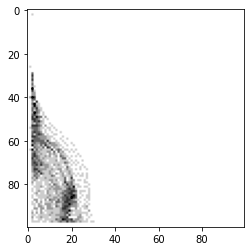

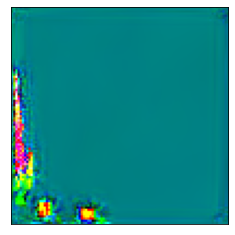

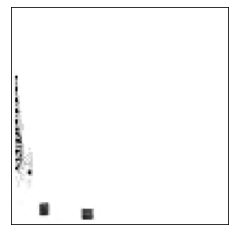

In [24]:
for i in range(301, 350):
    wholegif(index=i)